<a href="https://colab.research.google.com/github/amoghsawant17/EDA_Project_Amogh/blob/main/EDA_Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Hotel Booking Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

###Data Preparation and Cleaning
1. Load the file using Pandas
2. Look at some information about the data & the columns
3. Fix any missing or incorrect values

### Import Libraries


In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
!pip install pymysql
import pymysql
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

import seaborn as sns
from scipy.stats import *
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz

!pip install shap==0.40.0
import shap
import graphviz
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.7/371.7 kB 9.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shap: filename=shap-0.40.0-cp310-cp310-linux_x86_64.whl size=552493 sha256=f0667c56cc5db314ca3d2d2dd944ddf88f8c9a29d087cef9a651a268b0172044
  Stored in directory: /root/.cache/pip/wheels/33/28/e3/62a9dc612c58c1b8d1c16fa51e64941bbb38ac8a6decbad39c
Successfully built shap


### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Colab Notebooks/PYTHON_MODULE/EDA_Project/Hotel Bookings.csv'
df = pd.read_csv(file_path)

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(119390, 32)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

31994

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [9]:
missing_percentages = df.isnull().sum().sort_values(ascending=False)/len(df)
missing_percentages

company                           0.943069
agent                             0.136862
country                           0.004087
children                          0.000034
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
hotel                             0.000000
previous_cancellations            0.000000
days_in_waiting_list              0.000000
customer_type                     0.000000
adr                               0.000000
required_car_parking_spaces       0.000000
total_of_special_requests         0.000000
reservation_status                0.000000
previous_bookings_not_canceled    0.000000
is_repeated_guest                 0.000000
is_canceled                       0.000000
distribution_channel              0.000000
market_segment                    0.000000
meal                              0.000000
babies                            0.000000
adults     

<Axes: >

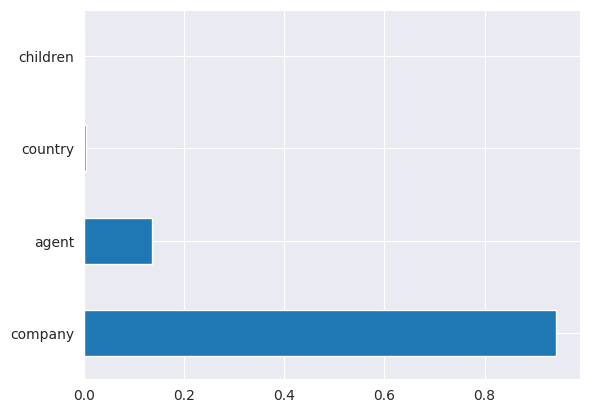

In [10]:
# Visualizing the missing values
missing_percentages[missing_percentages!=0].plot(kind='barh')

In addition to the heatmap, there is a bar on the right side of this diagram. This is a line plot for each row's data completeness. In this dataset, all rows have 29 - 32 valid values and hence 0 - 3 missing values.

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Variables Description

* **Hotel:** H1=Resort Hotel;  H2=City Hotel
* **Is_cancelled:** If the booking was cancelled(1) or not(0)
* **lead_time:** Number of days that elapsed between the entering date of the booking into PMS and the arrival date
* **arrival_date_year:** Year of arrival date
* **arrival_date_month:** Month of arrival date
* **arrival_date_week_number:** Week number of arrival date
* **arrival_dat_day:** Day of arrival date
* **stays_in_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* **stays_in_weekday_nights:** Number of weekend nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* **adults:** Number of adults
* **children:** Number of children
* **babies:** Number of babies
* **meal:** Kind of meal opted for
* **country:** Country code
* **market_segment:** Which segment the customer belongs to stay-corporate booking/Direct/TA/TO
* **Distribution_channel:** How the customer accessed the stay-corporate booking/Direct/TA/TO
* **is_repeated_guest:** Guest coming for first time or not
* **previous_cancellation:** Was there a cancellation before
* **previous_bookings:** Count of previous bookings
* **reserved_room_type:** Type of room reserved
* **assigned_room_type:** Type of room assigned
* **booking_changes:** Count of changes made to booking
* **deposit_type:** Deposit type
* **agent:** Booked through agent
* **days_in_waiting_list:** Number of days in waiting list
* **Customer_type:** Type of customer
* **required_car_parking:** If car parking is required
* **total_of_special_req:** Number of additional special requirements
* **reservation_status:** Reservation status
* **reservation_status_date:** Date of the specific status



### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  hotel is 2 .
No. of unique values in  is_canceled is 2 .
No. of unique values in  lead_time is 479 .
No. of unique values in  arrival_date_year is 3 .
No. of unique values in  arrival_date_month is 12 .
No. of unique values in  arrival_date_week_number is 53 .
No. of unique values in  arrival_date_day_of_month is 31 .
No. of unique values in  stays_in_weekend_nights is 17 .
No. of unique values in  stays_in_week_nights is 35 .
No. of unique values in  adults is 14 .
No. of unique values in  children is 5 .
No. of unique values in  babies is 5 .
No. of unique values in  meal is 5 .
No. of unique values in  country is 177 .
No. of unique values in  market_segment is 8 .
No. of unique values in  distribution_channel is 5 .
No. of unique values in  is_repeated_guest is 2 .
No. of unique values in  previous_cancellations is 15 .
No. of unique values in  previous_bookings_not_canceled is 73 .
No. of unique values in  reserved_room_type is 10 .
No. of unique values in

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***